# Pretreatment 0

Raw absorbance spectra.

## Setup

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.ticker import MaxNLocator

In [9]:
# read in prepared dataset from previous step
df = pd.read_pickle("../2_sample_selection/data/prepared/mango_dmc_and_spectra_v2.pkl")
wavelength_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in wavelength_cols]
wavelength_cols = wavelength_cols.astype(int).tolist()
df.columns = descriptive_cols + wavelength_cols
df

,partition_1,outlier_flag_1,train_partition_1,sample_order_1,origin,population,date,season,region,cultivar,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,train,0,calibration,25670,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train,0,calibration,16789,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train,0,calibration,63678,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,0,calibration,81577,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train,0,calibration,5762,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,,6265,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88449,test,0,,54886,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88450,test,0,,76820,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88451,test,0,,860,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Wavelength Range

In [10]:
initial_wavelengths = [w for w in wavelength_cols if 309 <= w <= 1149]
final_wavelengths = [w for w in wavelength_cols if 684 <= w <= 990]

## Pretreatment

In [11]:
# simply raw absorbance
p1 = df[initial_wavelengths]
p1.columns = initial_wavelengths
p1

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-0.331280,-0.230921,-0.333670,-0.335732,-0.316474,-0.454959,-0.438998,-0.403578,-0.407895,-0.286772,...,-0.361612,-0.383822,-0.345500,-0.336628,-0.319799,-0.258021,-0.245601,-0.142968,-0.134122,-0.099946
1,-0.361903,-0.435489,-0.401718,-0.339383,-0.354182,-0.424313,-0.428530,-0.395883,-0.463617,-0.435997,...,-0.392400,-0.370917,-0.358545,-0.322472,-0.330231,-0.268096,-0.216323,-0.193553,-0.182665,-0.113047
2,-0.416125,-0.393934,-0.457833,-0.427786,-0.333997,-0.349580,-0.426202,-0.332990,-0.345471,-0.411378,...,-0.357548,-0.359987,-0.360750,-0.367752,-0.309994,-0.275585,-0.257435,-0.155496,-0.128074,-0.097942
3,-0.365840,-0.424752,-0.406553,-0.370280,-0.369247,-0.397355,-0.435719,-0.347667,-0.374992,-0.404723,...,-0.371852,-0.351618,-0.359620,-0.335337,-0.319432,-0.273673,-0.228374,-0.181449,-0.129967,-0.113481
4,-0.479682,-0.403551,-0.382657,-0.434473,-0.400756,-0.294791,-0.362688,-0.278762,-0.464990,-0.310895,...,-0.401768,-0.356444,-0.369370,-0.312450,-0.327417,-0.258553,-0.229518,-0.181592,-0.153142,-0.115271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-0.249538,0.014473,0.213377,0.314215,0.300654,0.160862,-0.158992,-0.061177,0.108025,-0.037867,...,0.213113,0.239179,0.270558,0.309281,0.346996,0.390992,0.427297,0.000000,0.000000,0.000000
88449,0.262905,0.097746,1.441031,-0.076973,0.056921,-0.462767,-0.689058,-0.424293,-0.284243,-0.504293,...,0.201033,0.221015,0.260635,0.303508,0.341502,0.384739,0.416927,0.000000,0.000000,0.000000
88450,0.140915,-0.147302,0.049367,0.320546,0.050564,0.000000,-0.051989,-0.179539,-0.652067,-1.042746,...,0.243450,0.274413,0.311304,0.364267,0.425517,0.474339,0.523918,0.000000,0.000000,0.000000
88451,0.093143,0.505401,0.236635,0.119781,0.824079,0.357347,0.996855,0.627651,-0.114433,0.005879,...,0.246126,0.264123,0.293565,0.341017,0.377298,0.410651,0.439393,0.000000,0.000000,0.000000


### Visualise Pretreatments

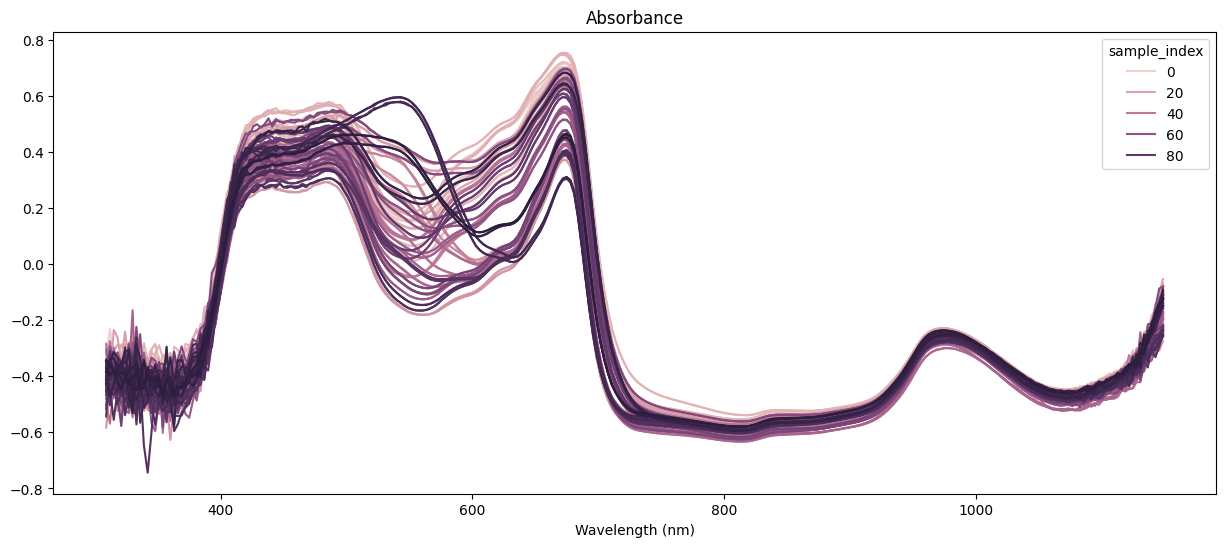

In [12]:
first_n_samples = 100
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

def plot_data(data, ax, title, xlabel):
    plot = sns.lineplot(
        data=(data[:first_n_samples]
              .reset_index(names="sample_index")
              .melt(id_vars="sample_index", var_name="wavelength", value_name="absorbance")),
        x="wavelength", y="absorbance", hue="sample_index", ax=ax
    )
    plot.set(title=title, xlabel=xlabel, ylabel=None)
    plot.xaxis.set_major_locator(MaxNLocator(nbins=6))

# Absorbance
plot_data(df[initial_wavelengths], axs, "Absorbance", "Wavelength (nm)")

plt.show()

## Prepare final dataset

In [13]:
df_final = pd.concat(
    objs=[
        df[descriptive_cols],
        p1[final_wavelengths].add_suffix("_abs"),
    ],
    axis=1
)
df_final

,partition_1,outlier_flag_1,train_partition_1,sample_order_1,origin,population,date,season,region,cultivar,...,963_abs,966_abs,969_abs,972_abs,975_abs,978_abs,981_abs,984_abs,987_abs,990_abs
0,train,0,calibration,25670,published,100100,2015-09-27,2015,NT,caly,...,-0.279897,-0.272120,-0.267008,-0.262865,-0.261130,-0.260309,-0.262636,-0.264400,-0.268173,-0.273766
1,train,0,calibration,16789,published,100100,2015-09-27,2015,NT,caly,...,-0.280150,-0.272087,-0.266581,-0.262944,-0.262157,-0.261107,-0.262015,-0.264809,-0.269062,-0.273017
2,train,0,calibration,63678,published,100100,2015-09-27,2015,NT,caly,...,-0.263678,-0.256389,-0.251702,-0.250200,-0.249016,-0.251186,-0.253842,-0.257452,-0.262652,-0.267903
3,train,0,calibration,81577,published,100100,2015-09-27,2015,NT,caly,...,-0.263510,-0.255369,-0.251238,-0.249160,-0.248928,-0.250187,-0.253017,-0.258012,-0.262253,-0.268767
4,train,0,calibration,5762,published,100100,2015-09-27,2015,NT,caly,...,-0.276895,-0.269695,-0.265317,-0.262124,-0.260525,-0.263296,-0.261856,-0.263306,-0.266605,-0.272993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,,6265,marcelo,200800,NaT,2021,QLD,keitt,...,0.260573,0.267838,0.272118,0.274963,0.276181,0.275938,0.274865,0.272921,0.269670,0.265120
88449,test,0,,54886,marcelo,200800,NaT,2021,QLD,keitt,...,0.249633,0.256571,0.260812,0.263292,0.264743,0.264877,0.263558,0.260905,0.256930,0.252817
88450,test,0,,76820,marcelo,200800,NaT,2021,QLD,keitt,...,0.262449,0.270091,0.275286,0.278593,0.280780,0.281312,0.280202,0.278249,0.275209,0.271167
88451,test,0,,860,marcelo,200800,NaT,2021,QLD,keitt,...,0.292817,0.301455,0.307056,0.310769,0.312940,0.313250,0.311975,0.309474,0.305487,0.300970


## Output data

In [14]:
# output
df_final.to_pickle("data/interim/pretreatment_0.pkl")